In [10]:
import numpy as np
from torchvision import transforms, datasets
from torch.nn import functional as F
import torch
import matplotlib.pyplot as plt

In [11]:
dataset_folder = "/mnt1/Course_work/Deep Learning/LAB6/Face Mask Dataset"
train_dataset_path = dataset_folder + "/Train"
test_dataset_path = dataset_folder + "/Test"
validation_dataset_path = dataset_folder + "/Validation"

Categories = ['WithMask', 'WithoutMask']

In [12]:
# Converting the images_paths to tensors, Resizing the images to 64x64
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((224, 224))])

# Defining Transforms to create one hot encoded labels 
target_transform = transforms.Compose([transforms.Lambda(lambda quantity: F.one_hot(torch.tensor(quantity), num_classes=2))])

# Creating the dataset
train_data = datasets.ImageFolder(train_dataset_path, transform=transform, target_transform=target_transform)
test_data = datasets.ImageFolder(test_dataset_path, transform=transform, target_transform=target_transform)
validation_data = datasets.ImageFolder(validation_dataset_path, transform=transform, target_transform=target_transform)

tensor([1, 0])


/home/ihdav/anaconda3/envs/DeepLearningLab/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


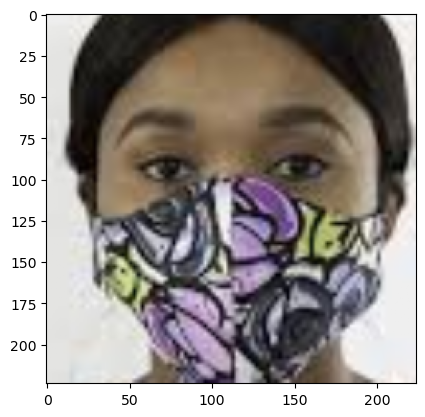

tensor([0, 1])


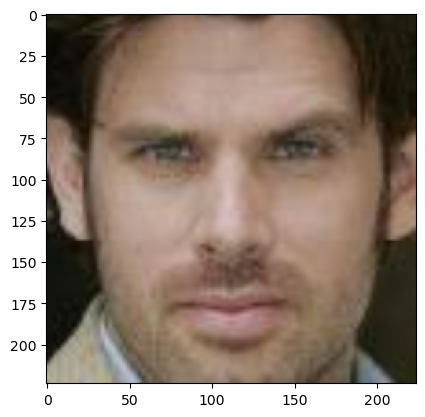

In [13]:
#Plotting the image
# Image Mask
image, label = test_data[10]
plt.imshow(image.permute(1, 2, 0))
print(label)
plt.show()

# Image No Mask
image, label = test_data[500]
print(label)
plt.imshow(image.permute(1, 2, 0))
plt.show()


In [14]:
## Saving the images as flattened lists in .h files

with open("test_data_class0.h","w") as file:
    file.write("""#include <stdint.h>

using namespace std;
               
static const double test_image_class0[224*224*3] = {""")
    
    image = test_data[0][0].permute(1, 2, 0).flatten().numpy()



    for i in range(len(image)):
        file.write(str(image[i]) + ", ")
    file.write("};")


In [15]:
## Saving the images as flattened lists in .h files

with open("test_data_class1.h","w") as file:
    file.write("""#include <stdint.h>

using namespace std;
               
static const double test_image_class1[224*224*3] = {""")
    
    image = test_data[500][0].permute(1, 2, 0).flatten().numpy()



    for i in range(len(image)):
        file.write(str(image[i]) + ", ")
    file.write("};")
